In [2]:
# imports
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd

In [3]:
#seting up Data frame from csv, and display columns.
path="shark_tank_us_dataset.csv"
shark_tank_df=pd.read_csv(path)
shark_tank_df.columns

Index(['Season Number', 'Startup Name', 'Episode Number', 'Pitch Number',
       'Season Start', 'Season End', 'Original Air Date', 'Industry',
       'Business Description', 'Company Website', 'Pitchers Gender',
       'Pitchers Average Age', 'Pitchers City', 'Pitchers State',
       'Entrepreneur Names', 'Multiple Entrepreneurs', 'US Viewership',
       'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested',
       'Got Deal', 'Total Deal Amount', 'Total Deal Equity', 'Deal Valuation',
       'Number of Sharks in Deal', 'Investment Amount Per Shark',
       'Equity Per Shark', 'Royalty Deal', 'Advisory Shares Equity', 'Loan',
       'Deal Has Conditions', 'Barbara Corcoran Investment Amount',
       'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount',
       'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount',
       'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount',
       'Robert Herjavec Investment Equity', 'Daymon

In [4]:
#selecting relevant columns for answering our questions and displaying df and columns
shark_tank_clean_df=shark_tank_df[['Startup Name', 'Pitch Number', 'Industry', 'Pitchers Gender', 'Pitchers State', 'Multiple Entrepreneurs', 'Original Ask Amount', 'Valuation Requested', 'Got Deal', 'Total Deal Amount', 'Deal Valuation', 'Number of Sharks in Deal','Barbara Corcoran Investment Amount',
       'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount',
       'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount',
       'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount',
       'Robert Herjavec Investment Equity', 'Daymond John Investment Amount',
       'Daymond John Investment Equity', 'Kevin O Leary Investment Amount',
       'Kevin O Leary Investment Equity']]
print(shark_tank_clean_df.columns)
shark_tank_clean_df.head()

Index(['Startup Name', 'Pitch Number', 'Industry', 'Pitchers Gender',
       'Pitchers State', 'Multiple Entrepreneurs', 'Original Ask Amount',
       'Valuation Requested', 'Got Deal', 'Total Deal Amount',
       'Deal Valuation', 'Number of Sharks in Deal',
       'Barbara Corcoran Investment Amount',
       'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount',
       'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount',
       'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount',
       'Robert Herjavec Investment Equity', 'Daymond John Investment Amount',
       'Daymond John Investment Equity', 'Kevin O Leary Investment Amount',
       'Kevin O Leary Investment Equity'],
      dtype='object')


,Startup Name,Pitch Number,Industry,Pitchers Gender,Pitchers State,Multiple Entrepreneurs,Original Ask Amount,Valuation Requested,Got Deal,Total Deal Amount,...,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity
0,AvaTheElephant,1,Health/Wellness,Female,GA,0.0,50000,333333,1,50000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mr.Tod'sPieFactory,2,Food and Beverage,Male,NJ,0.0,460000,4600000,1,460000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,230000.0,25.0,NaN,NaN
2,Wispots,3,Business Services,Male,NC,0.0,1200000,12000000,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CollegeFoxesPackingBoxes,4,Lifestyle/Home,Male,FL,0.0,250000,1000000,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IonicEar,5,Software/Tech,Male,MN,0.0,1000000,6666667,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


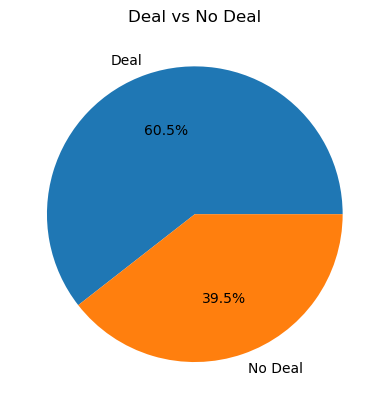

In [5]:
#How many People got deals?
deals =shark_tank_clean_df['Got Deal'].value_counts()
labels={ 'Deal', 'No Deal'}
plt.pie(deals, labels=labels,  autopct="%1.1f%%")
plt.title("Deal vs No Deal")
plt.show()

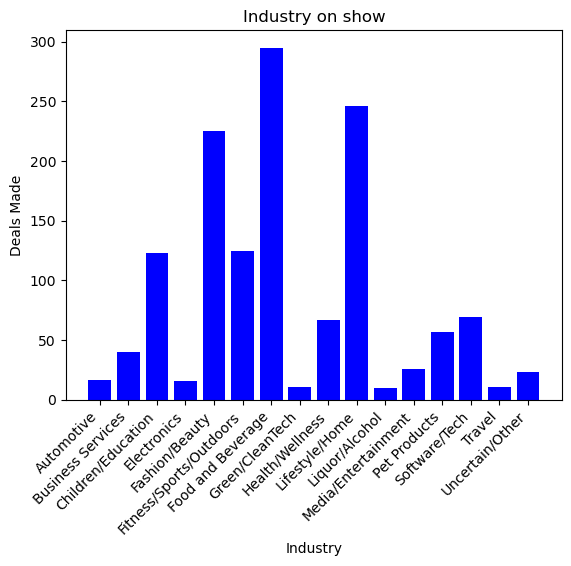

In [6]:
#which industries are shown the most
all_industry_df = shark_tank_clean_df.groupby('Industry').size()
x_axis = all_industry_df.index
y_axis = all_industry_df.values
plt.bar(x_axis, y_axis, color="b", align="center")
plt.xlabel('Industry')
plt.ylabel('Deals Made')
plt.title('Industry on show')
plt.xticks(rotation=45, ha='right')
plt.show()
# top industries: Food and Beverage, Lifestyle/Home, Fashion/Beauty

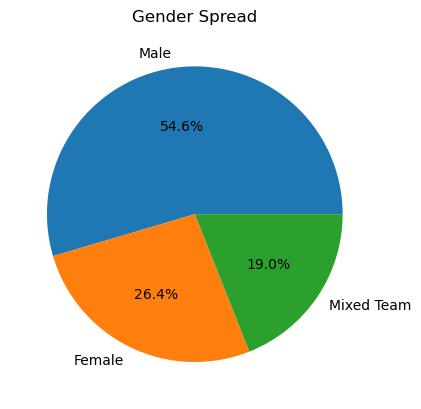

In [8]:
# what gender is represented the most
all_gender =shark_tank_clean_df['Pitchers Gender'].value_counts()
plt.pie(all_gender, labels=all_gender.index,  autopct="%1.1f%%")
plt.title("Gender Spread")
plt.show()

In [9]:
# We only wnat the data of people who got deals!!
tank_winners_df = shark_tank_clean_df.loc[shark_tank_clean_df['Got Deal'] == 1]


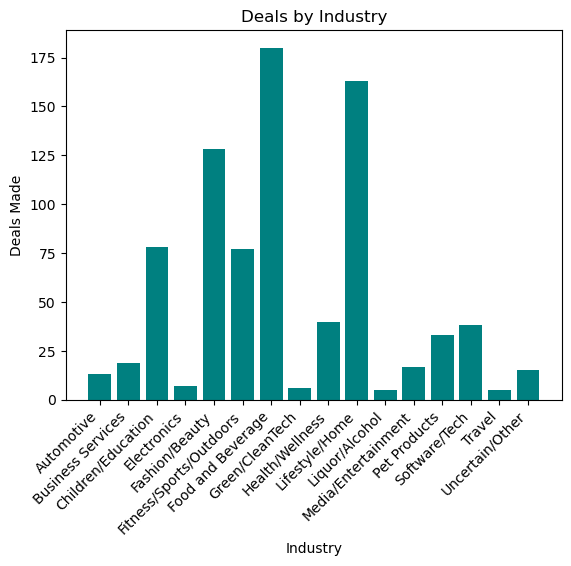

In [10]:
#Generated a bar graph to find the best Industy to be in
industry_df = tank_winners_df.groupby('Industry').size()
x_axis = industry_df.index
y_axis = industry_df.values
plt.bar(x_axis, y_axis, color="teal", align="center")
plt.xlabel('Industry')
plt.ylabel('Deals Made')
plt.title('Deals by Industry')
plt.xticks(rotation=45, ha='right')
plt.show()
# top industries: Food and Beverage, Lifestyle/Home, Fashion/Beauty

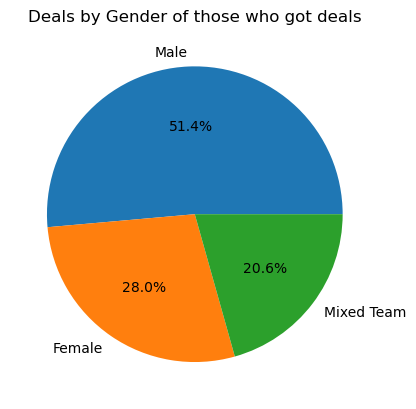

In [11]:
#Lets find out if there is a Gender bias 
gender =tank_winners_df['Pitchers Gender'].value_counts()
plt.pie(gender, labels=gender.index,  autopct="%1.1f%%")
plt.title("Deals by Gender of those who got deals")
plt.show()


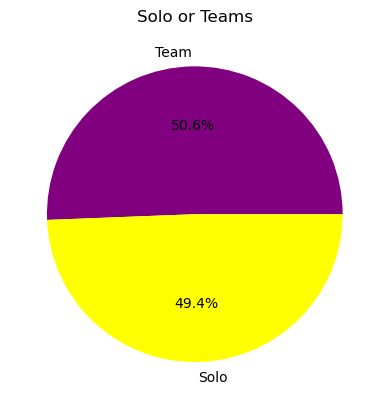

In [12]:
teams =tank_winners_df['Multiple Entrepreneurs'].value_counts()
labels={'Team','Solo'}
colors={'purple','yellow'}
plt.pie(teams, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Solo or Teams")
plt.show()

In [ ]:
cuban=countif(